In [880]:
import numpy as np
import pandas as pd
from functools import reduce
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
#pd.set_option("precision",4)

# Market Data for US

In [881]:
df_CRSP_market_daily=pd.read_csv('../data/CRSP/CRSP Daily Index Built on Market Capitalization.csv',\
index_col=0,parse_dates=True)

In [882]:
df_CRSP_market_daily =df_CRSP_market_daily[['vwretd']]['2001-01-01':'2020-12-31']

In [883]:
df_AQR_risk_free_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='RF',header=18,index_col=0,parse_dates=True)
df_AQR_risk_free_daily= df_AQR_risk_free_daily['2001-01-01':'2020-12-31']

In [892]:
df_AQR_MKT_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='MKT',header=18,index_col=0,parse_dates=True)
df_AQR_MKT_daily= df_AQR_MKT_daily['2001-01-01':'2020-12-31']

In [893]:
df_FF_5=pd.read_csv('../data/FF_Factors/F-F_Research_Data_5_Factors_2x3_daily.csv',index_col=0,parse_dates=True)
df_FF_5 = df_FF_5['2001-01-01':'2020-12-31']/100

In [894]:
df_FF_5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2001-01-02,-0.0352,0.0039,0.0165,0.0158,0.0161,0.00026
2001-01-03,0.0539,-0.0065,-0.0439,-0.0266,-0.0594,0.00026
2001-01-04,-0.0130,0.0097,-0.0030,0.0052,-0.0080,0.00026
2001-01-05,-0.0298,0.0071,0.0238,0.0190,0.0231,0.00026
2001-01-08,-0.0036,-0.0043,0.0126,0.0098,0.0067,0.00026
...,...,...,...,...,...,...
2020-12-24,0.0021,-0.0043,-0.0017,0.0024,-0.0005,0.00000
2020-12-28,0.0046,-0.0065,0.0032,0.0146,0.0050,0.00000
2020-12-29,-0.0040,-0.0142,0.0024,0.0075,-0.0028,0.00000


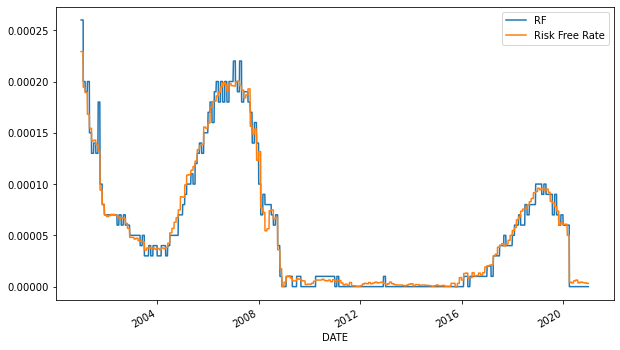

In [895]:
fig, ax =plt.subplots(figsize=(10,6))

df_FF_5.RF.plot(ax=ax)
(df_AQR_risk_free_daily).plot(ax=ax)

plt.legend()

In [896]:
dfs_market_merged=[df_FF_5[['Mkt-RF']],df_CRSP_market_daily[['vwretd']],df_AQR_MKT_daily[['USA']]]
dfs_market_merged=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs_market_merged)

<AxesSubplot:>

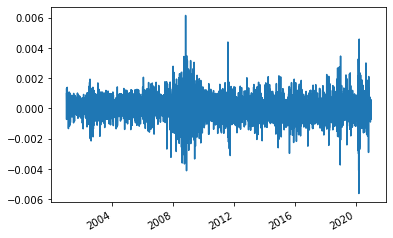

In [897]:
(dfs_market_merged['vwretd']-dfs_market_merged['Mkt-RF']).plot()

In [898]:
dfs_market_merged

,Mkt-RF,vwretd,USA
2001-01-02,-0.0352,-0.034230,-0.034543
2001-01-03,0.0539,0.053170,0.053313
2001-01-04,-0.0130,-0.011674,-0.010935
2001-01-05,-0.0298,-0.028909,-0.028499
2001-01-08,-0.0036,-0.003410,-0.003914
...,...,...,...
2020-12-24,0.0021,0.002332,0.002347
2020-12-28,0.0046,0.003870,0.003893
2020-12-29,-0.0040,-0.003649,-0.003812
2020-12-30,0.0027,0.003281,0.003364


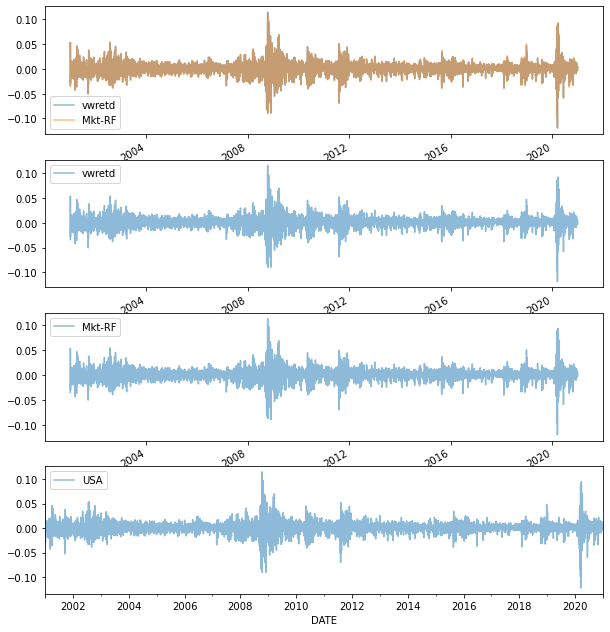

In [899]:
fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(10,12))

(df_CRSP_market_daily.vwretd).plot(ax=ax[0],alpha=0.5)
df_FF_5['Mkt-RF'].plot(ax=ax[0],alpha=0.5)

(df_CRSP_market_daily.vwretd).plot(ax=ax[1],alpha=0.5)

df_FF_5['Mkt-RF'].plot(ax=ax[2],alpha=0.5)

df_AQR_MKT_daily['USA'].plot(ax=ax[3],alpha=0.5)

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

# Construct the Table 3 for US

In [1192]:
def get_alpha(df, factors,portfolio):
    x = df[factors].copy()
    x = sm.add_constant(x)
    results = sm.OLS(df_Port_FF5[portfolio], x).fit(cov_type='HC1')
    return results.params[0],results.params[1],results.tvalues[0]

In [1242]:
df_betas=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/beta.pickle')
df_returns=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/return.pickle')
df_betas = df_betas.astype('float64')
df_returns = df_returns.astype('float64')

<AxesSubplot:>

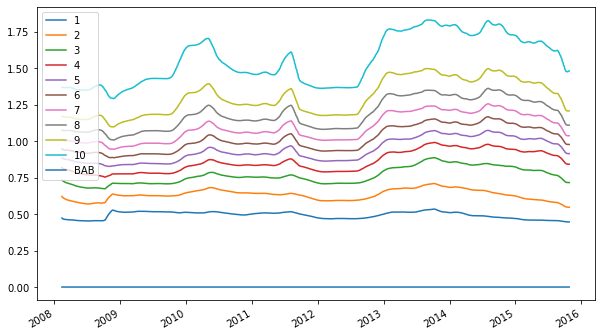

In [1243]:
df_betas.rolling(30).mean().plot(figsize=(10,6))

<AxesSubplot:>

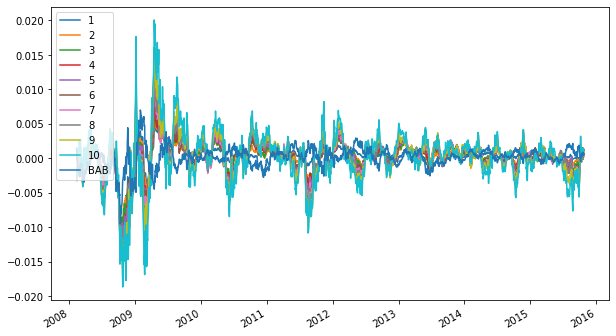

In [1244]:
df_returns.rolling(30).mean().plot(figsize=(10,6))

In [1245]:
df_table_3=pd.DataFrame(index=['Excess Return','CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha','Beta(ex ante)','Beta(realized)','Volatility','Sharpe Ratio'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [1246]:
df_table_4=pd.DataFrame(index=['CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [1247]:
df_Port_FF5=df_returns.merge(df_FF_5,left_index=True,right_index=True)
df_Port_FF5 = df_Port_FF5.dropna()

In [1248]:
df_Port_FF5 = df_Port_FF5['2009-01-01':]

In [1249]:
df_Port_FF5.index

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
               '2015-10-19', '2015-10-20', '2015-10-21', '2015-10-22',
               '2015-10-23', '2015-10-26'],
              dtype='datetime64[ns]', length=1716, freq=None)

In [1250]:
df_Port_FF5

,1,2,3,4,5,6,7,8,9,10,BAB,Mkt-RF,SMB,HML,RMW,CMA,RF
2009-01-02,0.027545,0.023646,0.023103,0.028013,0.034537,0.030394,0.025675,0.028508,0.038805,0.042193,0.010155,0.0311,-0.0136,-0.0042,-0.0020,-0.0015,0.0
2009-01-05,0.016488,0.013279,0.007245,0.008639,0.007574,0.004934,0.005089,0.011262,0.013678,0.020106,0.007909,-0.0028,0.0036,-0.0115,-0.0037,-0.0055,0.0
2009-01-06,0.018553,0.019232,0.016392,0.017807,0.027616,0.024362,0.028865,0.031070,0.036421,0.056896,-0.006464,0.0087,0.0113,0.0087,-0.0048,-0.0012,0.0
2009-01-07,-0.004602,-0.009844,-0.012357,-0.021955,-0.029134,-0.028901,-0.033004,-0.039683,-0.042392,-0.051773,0.020882,-0.0296,-0.0001,-0.0115,0.0025,0.0011,0.0
2009-01-08,0.012118,0.008444,0.007053,0.005531,0.008697,0.010400,0.009596,0.010335,0.010326,0.020821,0.002354,0.0047,0.0066,0.0042,-0.0031,0.0066,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-20,0.000989,-0.000139,0.001474,0.000121,0.001969,0.000006,0.002862,0.001339,0.000158,0.004756,-0.000717,-0.0015,0.0016,0.0119,0.0048,0.0027,0.0
2015-10-21,0.000638,0.000466,-0.005204,-0.008816,-0.008888,-0.011652,-0.013916,-0.015206,-0.013566,-0.020653,0.009511,-0.0074,-0.0088,-0.0023,0.0046,0.0024,0.0
2015-10-22,0.002135,0.003066,0.007383,0.008326,0.010833,0.008706,0.008276,0.011356,0.011094,0.015580,-0.002267,0.0150,-0.0076,0.0033,0.0007,0.0057,0.0
2015-10-23,0.000613,-0.000488,0.003287,0.000786,0.006854,0.006940,0.009038,0.008024,0.009456,0.011187,-0.005539,0.0109,-0.0008,-0.0054,0.0019,-0.0084,0.0


In [1251]:
columns = np.concatenate((np.arange(1,11,1), ['BAB'])).astype(str)

df_table_3.loc[df_table_3.index=='Excess Return',:]=\
((((1+df_Port_FF5).cumprod().iloc[-1,:11])**(252/len(df_Port_FF5))-1)*100).values/12

df_table_3.loc[df_table_3.index=='CAPM alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Three-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Four-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Five-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW','CMA'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Beta(ex ante)',:]=\
df_betas.mean().values

df_table_3.loc[df_table_3.index=='Beta(realized)',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF'],i)[1] for i in columns]

df_table_3.loc[df_table_3.index=='Volatility',:]=\
[df_Port_FF5[i].std()*np.sqrt(252)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Sharpe Ratio',:]=\
(df_table_3.loc['Excess Return']*12/df_table_3.loc['Volatility'])[:].values

In [1252]:
df_table_3

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
Excess Return,0.970609,1.0853,1.19918,1.0892,1.24704,1.00829,1.0322,0.817603,0.836346,0.660046,0.761988
CAPM alpha,0.765411,0.553608,0.369896,0.0918247,0.0810638,-0.274052,-0.388865,-0.728332,-0.847189,-1.27036,1.54478
Three-factor alpha,0.793712,0.599861,0.40386,0.134042,0.165708,-0.146037,-0.213119,-0.497849,-0.567821,-0.839945,1.33938
Four-factor alpha,0.78252,0.596448,0.402771,0.129835,0.160364,-0.152487,-0.221884,-0.506897,-0.572487,-0.821425,1.33469
Five-factor alpha,0.790332,0.581667,0.387299,0.114882,0.155014,-0.147822,-0.205893,-0.477861,-0.520217,-0.735187,1.27271
Beta(ex ante),0.491801,0.631214,0.762922,0.858439,0.936469,1.01126,1.09129,1.18194,1.29867,1.55431,0
Beta(realized),0.149226,0.387031,0.614447,0.76052,0.894211,1.01512,1.14357,1.27884,1.42102,1.723,-0.507686
Volatility,5.7219,8.50006,12.1379,14.6782,17.0676,19.3468,21.8205,24.4991,27.3282,33.8031,12.0197
Sharpe Ratio,2.03557,1.53218,1.18555,0.890463,0.876777,0.625402,0.567648,0.400473,0.367246,0.234315,0.760743


In [1253]:
df_table_4.loc[df_table_4.index=='CAPM alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Three-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Four-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Five-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW','CMA'],i)[2] for i in columns]


In [1254]:
df_table_4

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
CAPM alpha,4.43492,3.37196,2.42624,0.608587,0.532338,-1.62943,-2.02793,-3.21975,-3.20119,-3.24173,5.89395
Three-factor alpha,4.61184,3.76652,2.82247,1.03059,1.47344,-1.38515,-2.00712,-4.15055,-3.74597,-3.16409,5.91283
Four-factor alpha,4.53429,3.75659,2.80725,0.993351,1.4167,-1.44145,-2.07599,-4.19576,-3.74432,-3.06799,5.89641
Five-factor alpha,4.58261,3.64626,2.69562,0.88003,1.37129,-1.40311,-1.94951,-4.07125,-3.5955,-2.88123,5.75276


# BAB Factor Comparison

In [1255]:
df_BAB_comparison=df_AQR_BAB_daily[['USA']].merge(df_returns[['BAB']],left_index=True,right_index=True)

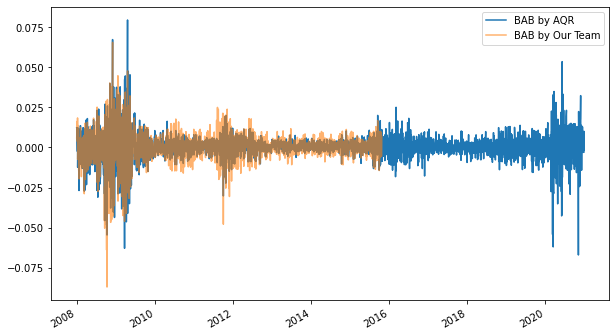

In [1256]:
fig, ax =plt.subplots(figsize=(10,6))

df_BAB_comparison['USA'].plot(ax=ax,label='BAB by AQR')
df_BAB_comparison['BAB'].plot(ax=ax,label='BAB by Our Team',alpha=0.6)

plt.legend()

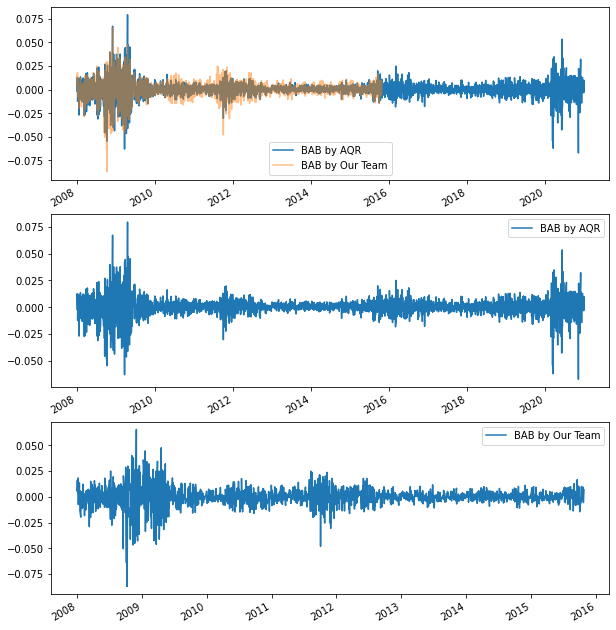

In [1257]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(10,12))

df_BAB_comparison['USA'].plot(ax=ax[0],label='BAB by AQR')
df_BAB_comparison['BAB'].plot(ax=ax[0],label='BAB by Our Team',alpha=0.5)
df_BAB_comparison['USA'].plot(ax=ax[1],label='BAB by AQR')
df_BAB_comparison['BAB'].plot(ax=ax[2],label='BAB by Our Team')


ax[0].legend()
ax[1].legend()
ax[2].legend()
